# Estudo de caso: Alugar, pagar à vista ou financiar um imóvel?
> Temos aqui um estudo de caso em matemática financeira resolvido em Python, que envolve calcular diferentes cenários com relação a aquisição de um imóvel. Adicionalmente, aprenda a manipular tabelas em Pandas e apresentação de gráficos com Matplotlib.

- toc: true
- badges: true
- comments: true
- author: Felipe N. Schuch & Mathiaz S. Tessmann
- image: images/house.png
- hide: true
- search_exclude: true
- categories: [Draft]

In [ ]:
#hide
#- categories: [Matemática Financeira,Pandas,Matplotlib]

## Introdução

* [Pandas](https://pandas.pydata.org/) é um pacote Python que fornece estruturas de dados rápidas, flexíveis e expressivas, projetadas para tornar o trabalho com dados “relacionais” ou “rotulados” fáceis e intuitivos. O objetivo é ser o alicerce fundamental de alto nível para a análise prática de dados do mundo real em Python. Além disso, tem o objetivo mais amplo de se tornar a mais poderosa e flexível ferramenta de análise / manipulação de dados de código aberto disponível em qualquer linguagem. Pandas é bem adequado para muitos tipos diferentes de dados:
    * Dados tabulares com colunas de tipos heterogêneos, como em uma tabela SQL, arquivo `.csv` ou planilha do Excel;
    * Dados de séries temporais ordenados e não ordenados (não necessariamente de frequência fixa);
    * Dados de matriz arbitrária (homogeneamente digitados ou heterogêneos) com rótulos de linha e coluna;
    * Qualquer outra forma de conjuntos de dados observacionais / estatísticos. Os dados realmente não precisam ser rotulados para serem colocados em uma estrutura de dados de pandas.
* [Matplotlib](https://matplotlib.org/) é uma biblioteca de plotagem 2D do Python, que produz figuras de qualidade de publicação em uma variedade de formatos impressos e ambientes interativos entre plataformas. Matplotlib pode ser usado em scripts Python, nos shells do Python e do IPython, no notebook Jupyter, nos servidores de aplicativos da web e em quatro kits de ferramentas de interface gráfica do usuário. **Matplotlib tenta tornar as coisas fáceis simples e as coisas difíceis possíveis**. Você pode gerar gráficos, histogramas, espectros de potência, gráficos de barras, gráficos de erros, diagramas de dispersão, etc., com apenas algumas linhas de código.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#hide

# https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html
plt.rcdefaults()
plt.rcParams.update({'figure.dpi' : 90})

# https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
plt.style.use('ggplot')

In [4]:
#hide

#https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
pd.options.mode.chained_assignment = None  # default='warn'

> Important: Essa não é uma recomendação de comprar. Lucros passados não são garantia de lucros futuros. Esse é um estudo de cenários didáticos e hipotéticos. Os autores se eximem completamente de qualquer responsabilidade sobre o uso, interpretação e consequências do uso direto ou indireto de qualquer informação contida nesse material.

## Sistemas de Amortização

### Sistema de Amortização Constante (Tabela SAC)

In [5]:
#collapse-hide
def sistema_sac(i=0.05,N=10,SD0=1000.00):
    sac = pd.DataFrame(columns=['Juros',
                                'Amortização',
                                'Parcela',
                                'Saldo Devedor'],
                       index=range(N+1)
                      )
    
    sac['Amortização'][1:] = SD0/N
    sac['Saldo Devedor'][0] = SD0

    for n in sac.index[1:]:
        sac['Juros'][n] = sac['Saldo Devedor'][n-1]*i
        sac['Parcela'][n] = sac['Juros'][n]+sac['Amortização'][n]
        sac['Saldo Devedor'][n] = sac['Saldo Devedor'][n-1] - sac['Amortização'][n]

    return sac.round(decimals=2)

In [6]:
sistema_sac(0.05,4,1000)

,Juros,Amortização,Parcela,Saldo Devedor
0,NaN,NaN,NaN,1000
1,50,250,300,750
2,37.5,250,287.5,500
3,25,250,275,250
4,12.5,250,262.5,0


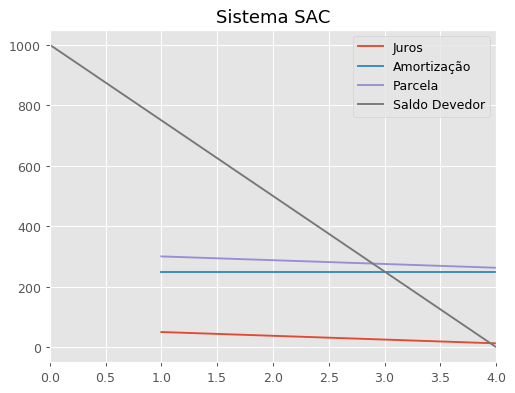

In [7]:
#hide
sistema_sac(0.05,4,1000).plot(title='Sistema SAC');

### Sistema de Parcelas Constantes (Tabela PRICE)

$$
\text{Parcela} = SD_0 \dfrac{i}{1-(1+i)^{-n}}
$$

In [8]:
#collapse-hide
def sistema_price(i=0.05,N=10,SD0=1000.00):
    price = pd.DataFrame(columns=['Juros',
                                  'Amortização',
                                  'Parcela',
                                  'Saldo Devedor'],
                         index=range(N+1)
                        )
    
    price['Parcela'][1:] = round(SD0*(i)/(1-(1+i)**(-N)),2)
    price['Saldo Devedor'][0] = SD0
    
    for n in price.index[1:]:
        price['Juros'][n] = round(price['Saldo Devedor'][n-1]*i,2)
        price['Amortização'][n] = price['Parcela'][n]-price['Juros'][n]
        price['Saldo Devedor'][n] = price['Saldo Devedor'][n-1] - price['Amortização'][n]

    return price.round(decimals=2)

In [9]:
sistema_price(0.05,4,1000)

,Juros,Amortização,Parcela,Saldo Devedor
0,NaN,NaN,NaN,1000
1,50,232.01,282.01,767.99
2,38.4,243.61,282.01,524.38
3,26.22,255.79,282.01,268.59
4,13.43,268.58,282.01,0.01


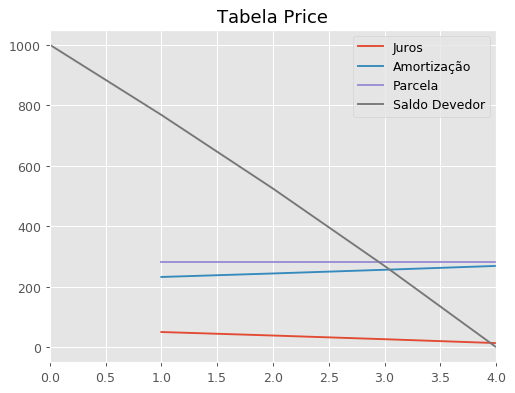

In [10]:
#hide
sistema_price(0.05,4,1000).plot(title='Tabela Price');

## Cenários

In [11]:
def taxa_anual_para_mensal(i):
    return (1.+i)**(1./12.)-1.

In [12]:
entrada = 100000.00
valor_do_financiamento = 400000.00
taxa_financeamento_anual = 0.0942
taxa_aluguel_anual = 0.04
rendimento_investimentos_anual = 0.08
tempo_anos = 30

sistema = 'Sistema SAC'
#sistema = 'Sistema PRICE'

In [13]:
valor_do_imovel = entrada + valor_do_financiamento
taxa_financeamento = taxa_anual_para_mensal(taxa_financeamento_anual)
taxa_aluguel = taxa_anual_para_mensal(taxa_aluguel_anual)
rendimento_investimentos = taxa_anual_para_mensal(rendimento_investimentos_anual)
tempo = tempo_anos * 12

### Financiar

In [14]:
if sistema == 'Sistema SAC':
    financiar = sistema_sac(taxa_financeamento,tempo,valor_do_financiamento)
elif sistema == 'Sistema PRICE':
    financiar = sistema_price(taxa_financeamento,tempo,valor_do_financiamento)

In [15]:
financiar['Patrimônio - Imóvel'] = financiar['Amortização'].cumsum() + entrada
financiar['Custo - Juros'] = financiar['Juros'].cumsum()

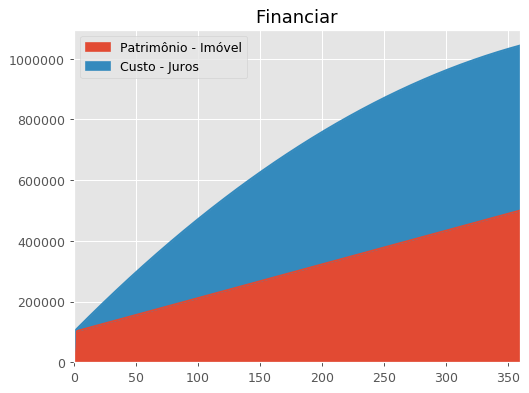

In [16]:
financiar[['Patrimônio - Imóvel', 'Custo - Juros']].plot.area(title='Financiar');

### Alugar

In [17]:
alugar = pd.DataFrame(index=range(tempo+1))

In [18]:
aluguel = (valor_do_imovel)*taxa_aluguel
alugar['Aluguel'] = aluguel
alugar['Aluguel'][0] = 0.0
alugar['Custo - Aluguel'] = alugar['Aluguel'].cumsum()
alugar['Aportes'] = financiar['Parcela'] - aluguel
alugar['Aportes'][0] = entrada

In [19]:
alugar['Patrimônio'] = alugar['Aportes']

for n in alugar.index[1:]:
    alugar['Patrimônio'][n] = alugar['Aportes'][n] + alugar['Patrimônio'][n-1] * (1. + rendimento_investimentos)

In [20]:
alugar['Patrimônio - Principal'] = alugar['Aportes'].cumsum()
alugar['Patrimônio - Rendimentos'] = alugar['Patrimônio'] - alugar['Patrimônio - Principal']

In [21]:
alugar

,Aluguel,Custo - Aluguel,Aportes,Patrimônio,Patrimônio - Principal,Patrimônio - Rendimentos
0,0.000000,0.000000,100000,100000,100000,0
1,1636.869891,1636.869891,2486.31,103130,102486,643.403
2,1636.869891,3273.739782,2477.94,106271,104964,1306.94
3,1636.869891,4910.609673,2469.58,109425,107434,1990.69
4,1636.869891,6547.479564,2461.21,112590,109895,2694.74
...,...,...,...,...,...,...
356,1636.869891,582725.681231,-483.925,3.06715e+06,456424,2.61073e+06
357,1636.869891,584362.551123,-492.291,3.08639e+06,455932,2.63046e+06
358,1636.869891,585999.421014,-500.658,3.10575e+06,455431,2.65032e+06
359,1636.869891,587636.290905,-509.025,3.12522e+06,454922,2.6703e+06


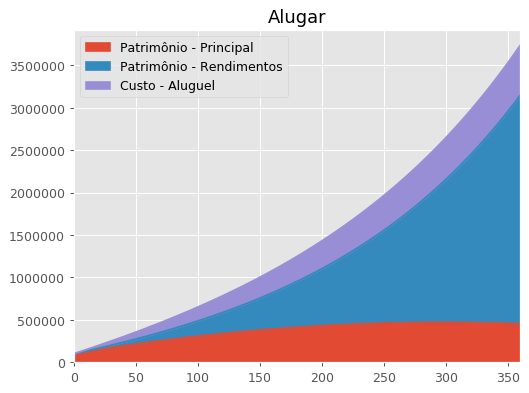

In [22]:
alugar[['Patrimônio - Principal', 'Patrimônio - Rendimentos', 'Custo - Aluguel']].plot.area(title='Alugar');

### Poupar e Comprar à Vista

O imóvel será comprado no mês 103


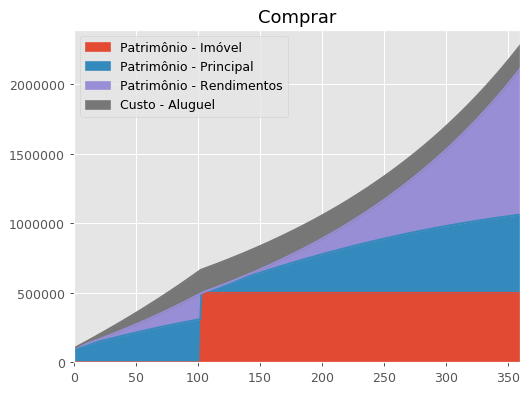

In [23]:
comprar = alugar.copy()

tcompra = comprar[comprar['Patrimônio']>=valor_do_imovel].first_valid_index()

print(f'O imóvel será comprado no mês {tcompra}')

comprar['Patrimônio - Imóvel'] = 0.0
comprar['Patrimônio - Imóvel'][tcompra::] += valor_do_imovel

comprar['Patrimônio'][tcompra::] -= valor_do_imovel
comprar['Patrimônio - Principal'][tcompra] -=  valor_do_imovel - comprar['Patrimônio - Rendimentos'][tcompra]
comprar['Patrimônio - Rendimentos'][tcompra] = 0.0
#

comprar['Aportes'][tcompra::] += comprar['Aluguel'][tcompra::]
comprar['Aluguel'][tcompra::] = 0.0
comprar['Custo - Aluguel'] = comprar['Aluguel'].cumsum()

for n in alugar.index[tcompra+1:]:
    comprar['Patrimônio - Principal'][n] = comprar['Patrimônio - Principal'][n-1] + comprar['Aportes'][n]
    comprar['Patrimônio - Rendimentos'][n] = comprar['Patrimônio'][n-1] * rendimento_investimentos + comprar['Patrimônio - Rendimentos'][n-1]
    comprar['Patrimônio'][n] = comprar['Patrimônio - Principal'][n] + comprar['Patrimônio - Rendimentos'][n]

comprar[['Patrimônio - Imóvel', 'Patrimônio - Principal', 'Patrimônio - Rendimentos', 'Custo - Aluguel']].plot.area(title='Comprar');

## Conclusão

In [24]:
summary = pd.DataFrame()

summary = summary.append(alugar.tail(1), ignore_index=True, sort=False)
summary = summary.append(comprar.tail(1), ignore_index=True, sort=False)
summary = summary.append(financiar.tail(1), ignore_index=True, sort=False)

summary = summary.drop(columns=['Juros', 'Amortização',	'Parcela', 'Saldo Devedor',	'Patrimônio', 'Aluguel', 'Aportes'])
summary.index = ['Alugar', 'Comprar à Vista', 'Financiar']
summary

,Custo - Aluguel,Patrimônio - Principal,Patrimônio - Rendimentos,Patrimônio - Imóvel,Custo - Juros
Alugar,589273.160796,454405,2.69041e+06,NaN,NaN
Comprar à Vista,166960.728892,562982,1.05087e+06,500000,NaN
Financiar,NaN,NaN,NaN,500000,543678


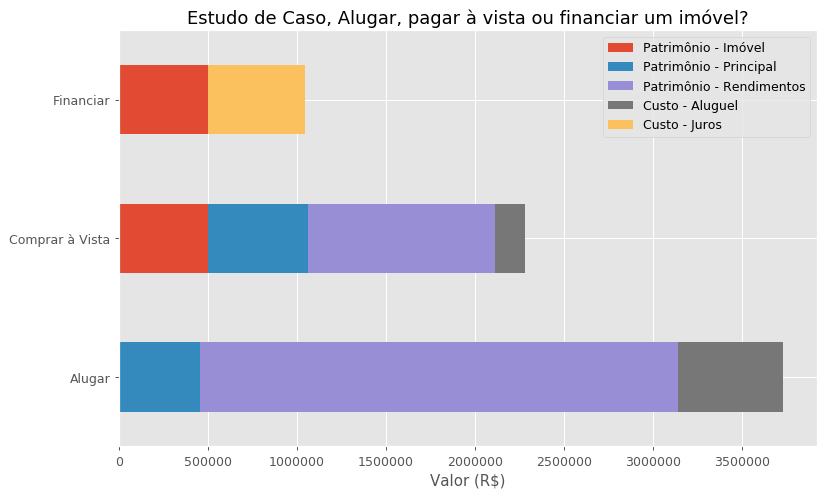

In [25]:
#hide_input

plt.rcParams.update({'figure.dpi' : 90,
                     "figure.figsize" : (10, 6)})

summary[['Patrimônio - Imóvel', 'Patrimônio - Principal', 'Patrimônio - Rendimentos', 'Custo - Aluguel', 'Custo - Juros']].plot.barh(stacked=True)
plt.title('Estudo de Caso, Alugar, pagar à vista ou financiar um imóvel?')
plt.xlabel('Valor (R$)')

#position bottom right
# plt.text(0., -1., '@aprenda.py, por F.N. Schuch & M.S. Tessmann',
#          fontsize=12, color='gray',
#          ha='left', va='bottom', xycoords='figure fraction')

plt.show()